In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')


0L

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    
    if(isMC):
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [5]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [6]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [7]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [8]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    temp = applyCut(temp, 'jet_pt>5', 'jet_pt>5')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## get data and apply cuts

In [9]:
df = getData(['data.root'])
df = applyCuts(df)

mc = getData(['mc.root'])
mc = applyCuts(mc)


Processed data.root in 0.3 seconds
0.2 < y < 0.7 170849  fraction kept: 100.0
Q2>150 170849  fraction kept: 100.0
e_pt >10 137246  fraction kept: 80.3

Processed mc.root in 0.1 seconds
0.2 < y < 0.7 118567  fraction kept: 100.0
Q2>150 118567  fraction kept: 100.0
e_pt >10 97889  fraction kept: 82.6


## plot electron variables (data and MC)

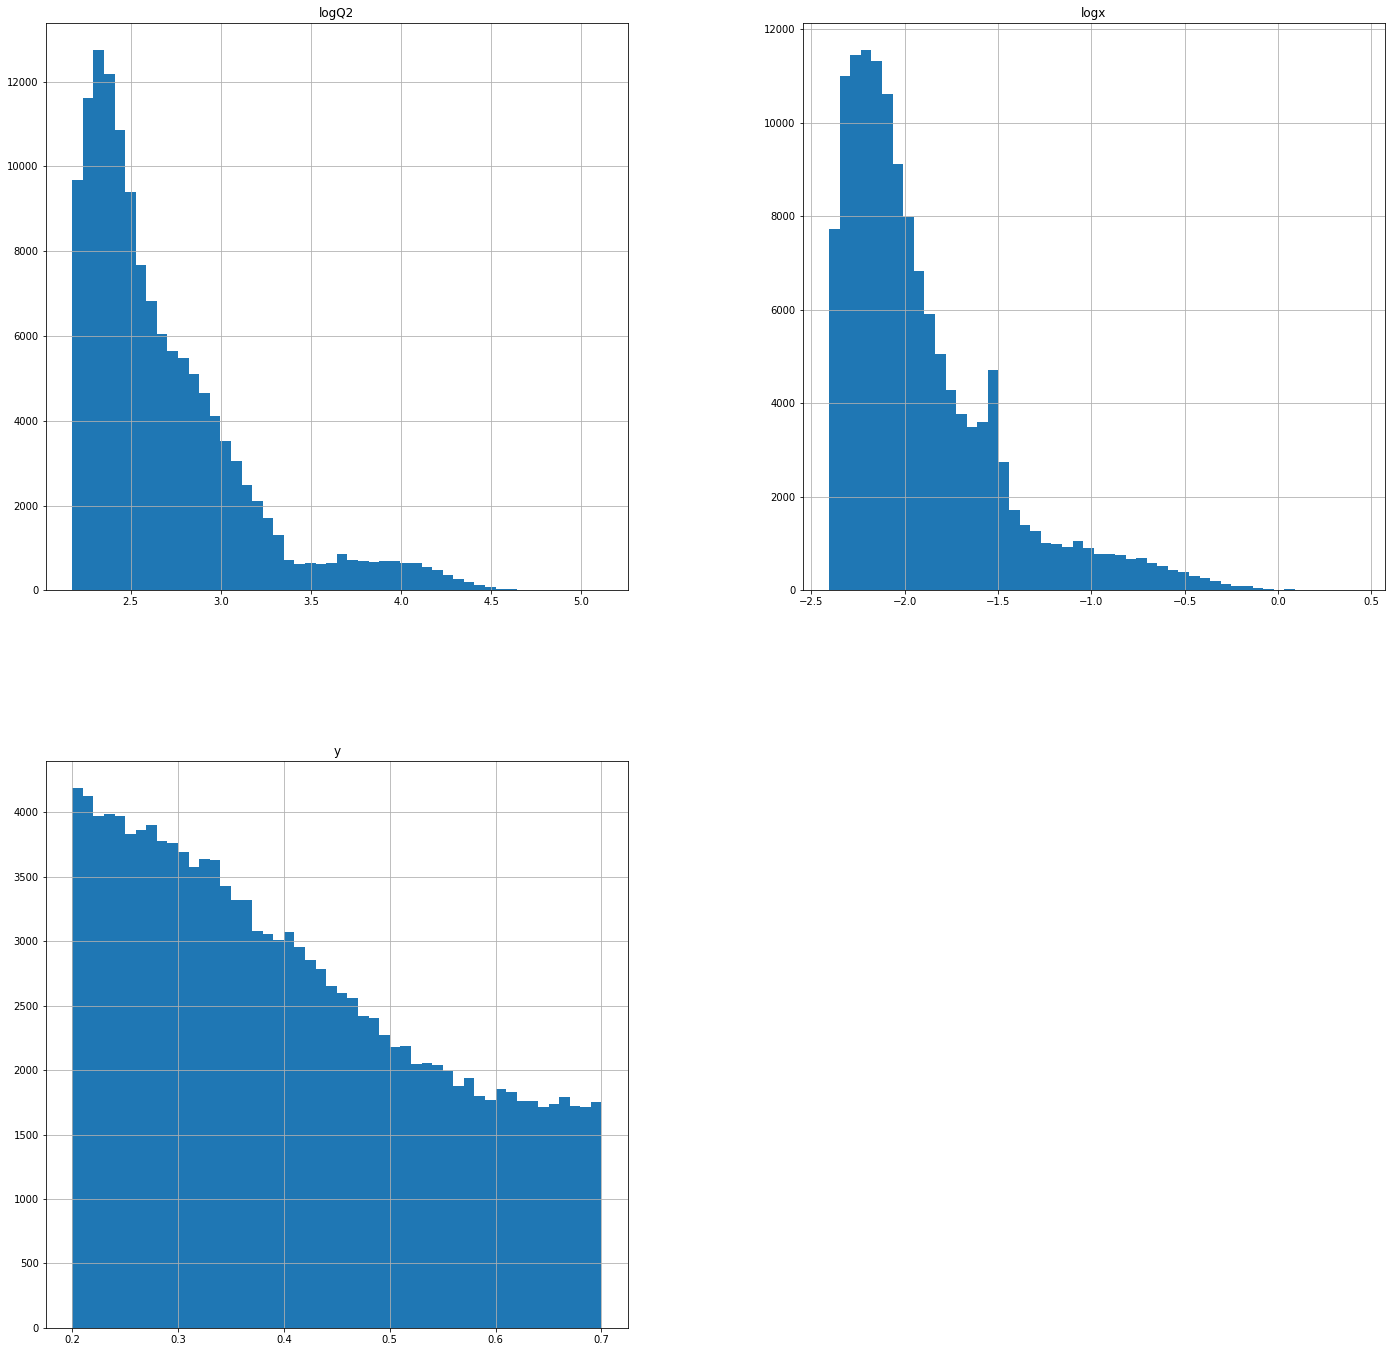

In [10]:
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y'])
plt.show()

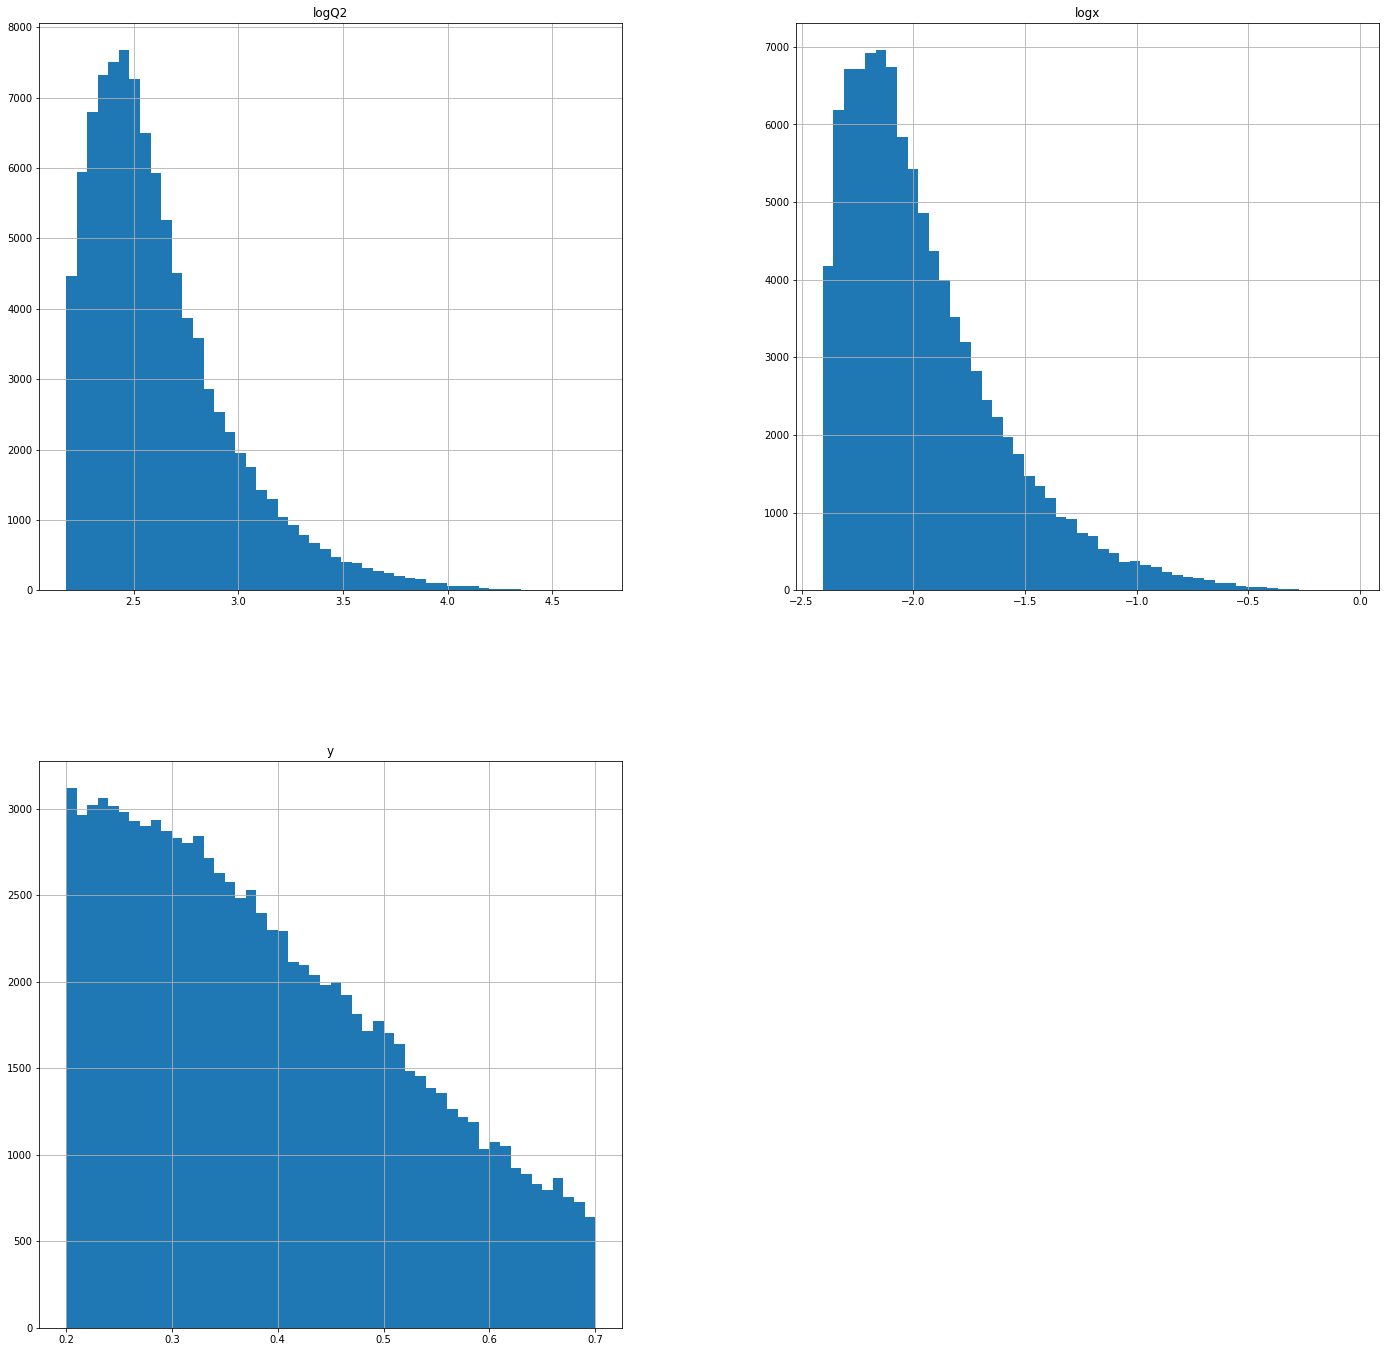

In [11]:
rc('text', usetex=False)
mc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y'])
plt.show()

## Get jet data and apply selection

In [12]:
df_jet      = getJetData(['data.root'])
df_jet = applyCutsJets(df_jet)

mc_jet = getJetData(['mc.root'],isMC=True)
mc_jet = applyCutsJets(mc_jet, isMC=True)


Processed data.root in 2.6 seconds
0.2 < y < 0.7 82882  fraction kept: 100.0
Q2>150 82882  fraction kept: 100.0
e_pt >10 70103  fraction kept: 84.6
jet_pt>5 70103  fraction kept: 100.0

Processed mc.root in 2.8 seconds
0.2 < y < 0.7 145313  fraction kept: 100.0
Q2>150 145313  fraction kept: 100.0
e_pt >10 125072  fraction kept: 86.1
jet_pt>5 125072  fraction kept: 100.0


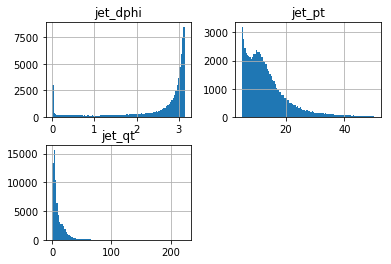

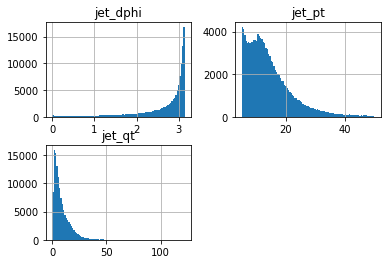

In [13]:
rc('text', usetex=False)
df_jet.hist(bins=100,column=['jet_qt','jet_pt','jet_dphi'])
plt.show()
mc_jet.hist(bins=100,column=['jet_qt','jet_pt','jet_dphi'])
plt.show()

## Peek into data format

In [14]:
df_jet.head()

,Q2,e_eta,jet_p,e_theta,jet_z,e_pt,jet_qt,jet_pt,e_p,y,x,jet_dphi,__array_index,jet_qtnormjetpt,jet_qtnormept
0,879.710022,-0.376511,35.104050,1.938715,0.417608,23.200243,2.658593,23.422041,24.864202,0.388149,0.022291,3.027879,0,0.113508,0.114593
1,2730.659180,0.095709,101.387787,1.475233,0.901017,44.909454,5.404735,49.694359,45.115303,0.261402,0.102743,3.088389,0,0.108760,0.120347
2,716.507141,-0.587720,21.532230,2.127339,0.789374,23.339975,6.849102,18.464420,27.488337,0.239708,0.029399,2.909355,0,0.370935,0.293449
3,587.693359,-0.670692,24.406557,2.196213,0.354631,20.800081,5.838788,15.020700,25.656332,0.263828,0.021909,3.094588,0,0.388716,0.280710
5,7025.206055,0.815204,6.487921,0.833281,0.317247,56.267387,59.472763,5.676654,76.022461,0.549334,0.125782,1.011843,0,10.476728,1.056967


In [15]:
mc_jet.head()

,genjet_dphi,genjet_p,Q2,e_eta,jet_p,genjet_z,e_theta,jet_z,e_pt,jet_qt,...,genjet_pt,x,genjet_qt,y,jet_dphi,__array_index,jet_qtnormjetpt,jet_qtnormept,genjet_qtnormept,genjet_qtnormjetpt
0,3.079526,12.256664,254.922729,-1.046057,13.814221,0.857135,2.465892,0.885191,13.145171,0.542107,...,11.887322,0.007791,1.477820,0.322165,3.134587,0,0.039630,0.041240,0.112423,0.124319
1,2.914071,21.416794,397.735748,-0.618839,24.922659,0.788812,2.153543,0.907934,13.378703,12.411582,...,21.266762,0.007120,8.768500,0.549978,2.871700,0,0.500824,0.927712,0.655407,0.412310
2,0.042612,7.360922,397.735748,-0.618839,8.956823,0.086080,2.153543,0.098983,13.378703,20.071711,...,5.625223,0.007120,19.000332,0.549978,0.011648,1,2.998772,1.500273,1.420192,3.377703
3,3.080378,17.544931,391.669769,-0.850275,18.794710,0.803371,2.333963,0.844662,16.605452,2.522576,...,16.979282,0.013028,1.093593,0.295986,3.025184,0,0.139223,0.151913,0.065857,0.064407
4,3.107881,36.255287,226.419922,-1.185321,35.859138,0.163802,2.548332,0.153019,13.420047,2.582835,...,11.432879,0.010896,2.030563,0.204586,3.067819,0,0.234854,0.192461,0.151308,0.177607


Cross section [17099.95354224  6314.78401778  2629.11398396   950.86950857
   307.63391771]
Cross section [4700.37379406 2637.34760371 1032.7476263   337.21123667  109.73947927]


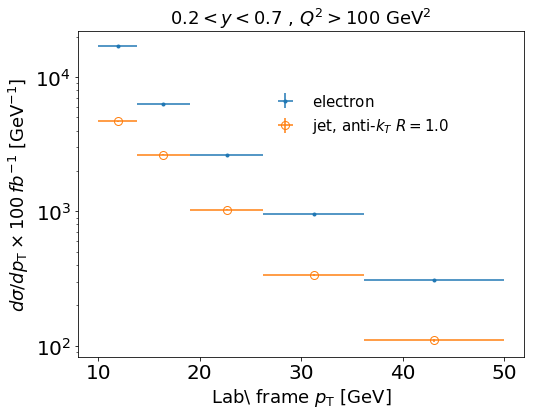

In [16]:
import seaborn as sns
nbins = 6
minpt = 10
maxpt = max(df_jet['jet_pt'])
fig, ax1 = plt.subplots(figsize=(8,6))

##Electron distribution
y, x  = np.histogram(df.query('e_pt>5')['e_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 

plt.errorbar(x,y, yerr=yerr,  xerr = xerr, fmt='.',ls='none',label=r'$\mathrm{electron}$')


y, x  = np.histogram(df_jet.query('jet_pt>5')['jet_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2

yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 
plt.errorbar(x,y, yerr=yerr,xerr = xerr, fmt='o',ls='none',markersize=8,fillstyle='none',label='$\mathrm{jet}$, $\mathrm{anti}$-$k_{T}$ $R=1.0$')

plt.yscale('log')
ax1.set_xlabel(r'$\mathrm{Lab}$\ $\mathrm{frame}$ $p_{\mathrm{T}}$ $\mathrm{[GeV]}$' ,fontsize=18)
ax1.set_ylabel(r'$d\sigma/d p_{\mathrm{T}} \times 100 \, fb^{-1}$ [$\mathrm{GeV^{-1}}$]', fontsize=18)
plt.title('$0.2 < y < 0.7$ , $Q^2 > 100\ \mathrm{GeV^2}$',   fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(loc='best',frameon=False,fontsize=18)#bbox_to_anchor=(0.40, 0.85

ax1.tick_params('both',labelsize=20)

###Mean x vs pT
#ax2 = ax1.twinx()
#ax2.tick_params(axis='y', labelcolor='red')
#sns.regplot(df['e_pt'], df['x'], x_bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins),fit_reg=None,color='red')
#ax2.set_ylabel('Mean $x$' ,color='red',fontsize=16)
#plt.yticks(fontsize=18)
#plt.xticks(fontsize=18)
#ax2.set_ylim([0.0,1.0])
#ax2.scale('log')



plt.savefig('H1_CrossSection_NC.png', bbox_inches='tight')
plt.savefig('H1_CrossSection_NC.pdf', bbox_inches='tight')

plt.legend(loc='best',frameon=False,fontsize=15,bbox_to_anchor=(0.40, 0.85))

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


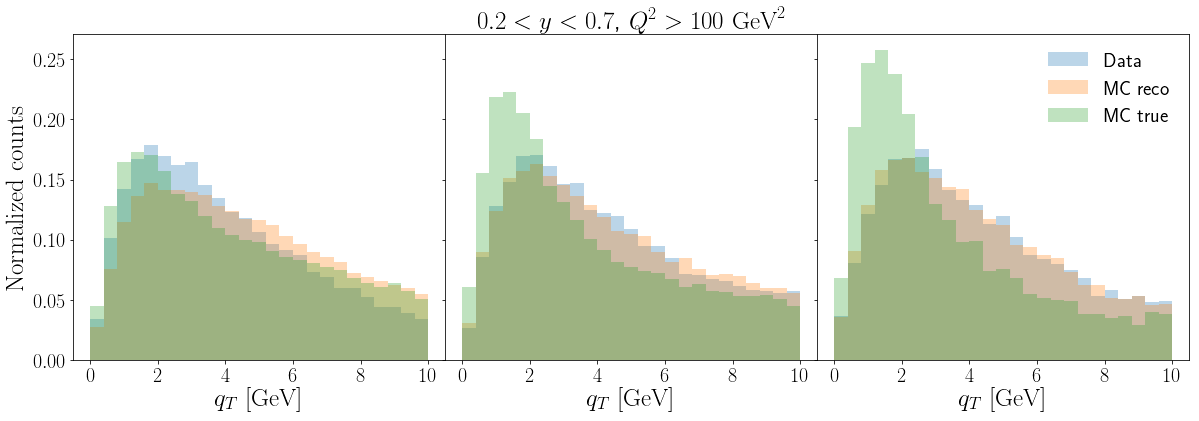

In [17]:
from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):
    #plot data
    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3,label='Data')
    #plot MC
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC reco')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC true')
    
    
    axs[counter].xaxis.set_label_text(r'$q_{T}$  $\mathrm{[GeV]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    plt.legend(prop={'size': 20}, frameon=False, loc='best')
    #axs[counter].text(0.07,10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqt.pdf', bbox_inches='tight')

###########
###########
###########


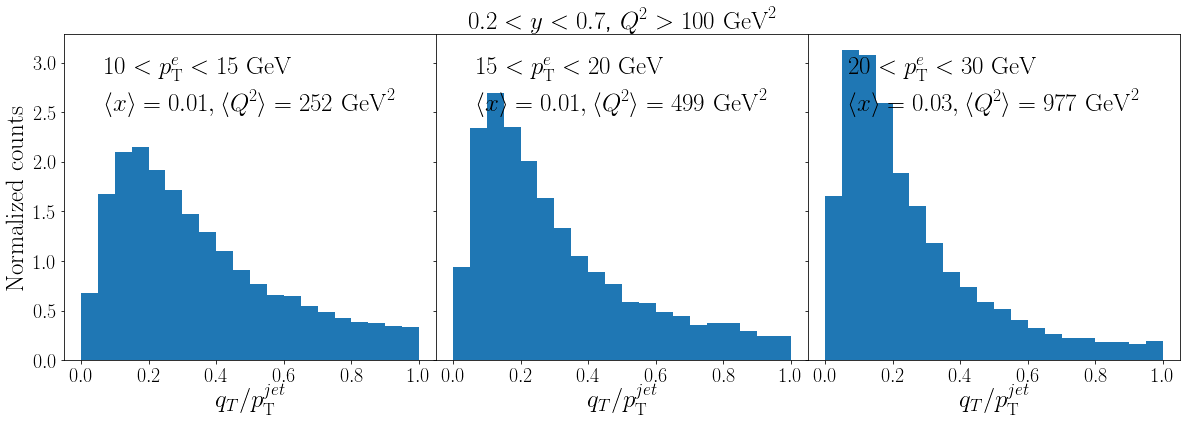

In [18]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    axs[counter].hist(df_cut['jet_qtnormjetpt'],bins=20,range=(0,1.0),normed=True)
    
    axs[counter].xaxis.set_label_text(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,3, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].text(0.07,2.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqtoverjetpt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqtoverjetpt.pdf', bbox_inches='tight')

17.087395  mean lepton pt
0.37535104  mean inelasticity
20.970337  mean jet p
14.366471  mean jet pT
count    14667.000000
mean        14.366471
std          6.276723
min          5.000930
25%          9.397035
50%         14.350382
75%         18.092111
max         49.977924
Name: jet_pt, dtype: float64
0.013602744  mean x
499.1152  mean Q2
count    14667.000000
mean       499.115204
std        162.414154
min        281.507263
25%        381.751740
50%        460.730591
75%        568.805481
max       1315.174316
Name: Q2, dtype: float64
###########


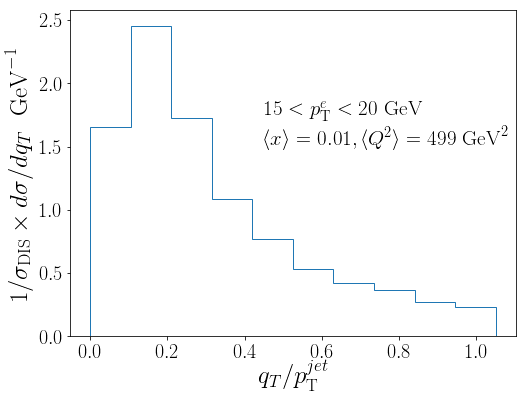

In [19]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
plt.hist(df_cut['jet_qtnormjetpt'],bins=10,range=(0,1.05),normed=True,histtype='step')    
plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
plt.ylabel(r'$1/\sigma_{\mathrm{DIS}} \times d\sigma/dq_{T}$ $\ \mathrm{ GeV}^{-1}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

plt.text(0.45,1.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')

17.087395  mean lepton pt
0.37535104  mean inelasticity
20.970337  mean jet p
14.366471  mean jet pT
count    14667.000000
mean        14.366471
std          6.276723
min          5.000930
25%          9.397035
50%         14.350382
75%         18.092111
max         49.977924
Name: jet_pt, dtype: float64
0.013602744  mean x
499.1152  mean Q2
count    14667.000000
mean       499.115204
std        162.414154
min        281.507263
25%        381.751740
50%        460.730591
75%        568.805481
max       1315.174316
Name: Q2, dtype: float64
###########
9407
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370
25% 

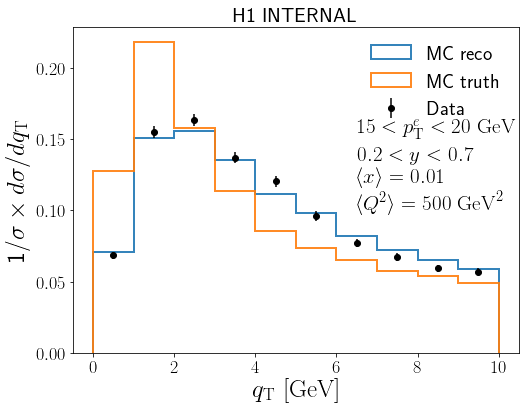

In [20]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = np.sum(y)
print integral 
y = y/width
y = y/integral
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, fmt='o',ls='none',label='Data',color='black')

#plot MC
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)
printSummary(df_cut)

df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC truth',histtype='step',lw=2)
printSummary(df_cut)



plt.xlabel(r'$q_{\mathrm{T}} $ $\mathrm{[GeV]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


plt.text(6.5,0.10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()) + '$\n$'+ r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()), fontsize=21)


#plt.text(6.5,0.10, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, r'$\mathrm{H1}$ $\mathrm{INTERNAL}$', fontsize=28)

#plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('H1 INTERNAL', fontsize=21)
plt.savefig('H1_qtplot.png', bbox_inches='tight')
plt.savefig('H1_qtplot.pdf', bbox_inches='tight')

17.087395  mean lepton pt
0.37535104  mean inelasticity
20.970337  mean jet p
14.366471  mean jet pT
count    14667.000000
mean        14.366471
std          6.276723
min          5.000930
25%          9.397035
50%         14.350382
75%         18.092111
max         49.977924
Name: jet_pt, dtype: float64
0.013602744  mean x
499.1152  mean Q2
count    14667.000000
mean       499.115204
std        162.414154
min        281.507263
25%        381.751740
50%        460.730591
75%        568.805481
max       1315.174316
Name: Q2, dtype: float64
###########
9318.0
[1623 2497 1802 1180  818  575  463  360]
[40.28647416 49.96999099 42.44997055 34.35112807 28.60069929 23.97915762
 21.51743479 18.97366596]
[0.17417901 0.26797596 0.19338914 0.12663662 0.08778708 0.06170852
 0.04968877 0.0386349 ]


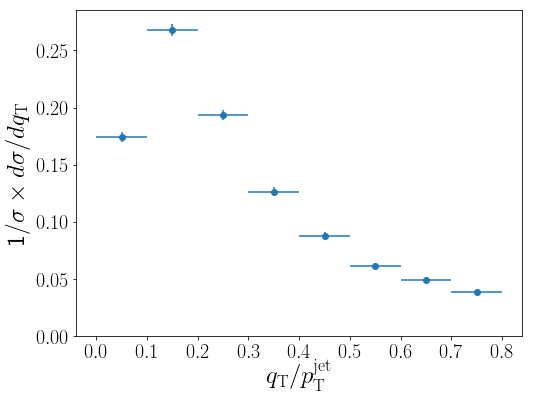

In [21]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=8,range=(0,0.80))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

17.087395  mean lepton pt
0.37535104  mean inelasticity
20.970337  mean jet p
14.366471  mean jet pT
count    14667.000000
mean        14.366471
std          6.276723
min          5.000930
25%          9.397035
50%         14.350382
75%         18.092111
max         49.977924
Name: jet_pt, dtype: float64
0.013602744  mean x
499.1152  mean Q2
count    14667.000000
mean       499.115204
std        162.414154
min        281.507263
25%        381.751740
50%        460.730591
75%        568.805481
max       1315.174316
Name: Q2, dtype: float64
###########
11930.0
[1633 2551 1938 1391 1063  897  846  716  515  380]
[40.4103947  50.5074252  44.02272141 37.2961124  32.60368077 29.94995826
 29.08607914 26.75817632 22.69361144 19.49358869]
[0.13688181 0.21383068 0.16244761 0.11659681 0.0891031  0.0751886
 0.07091366 0.06001676 0.04316848 0.03185247]


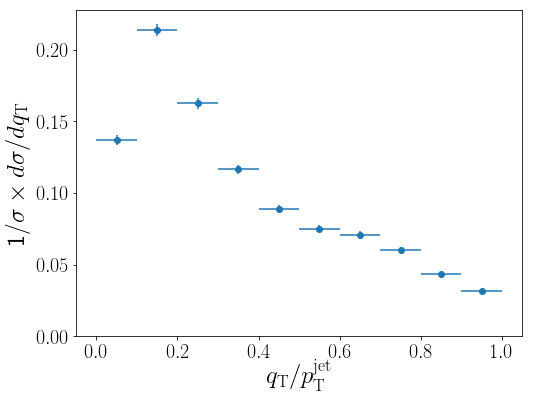

In [22]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormept'],bins=10,range=(0,1.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

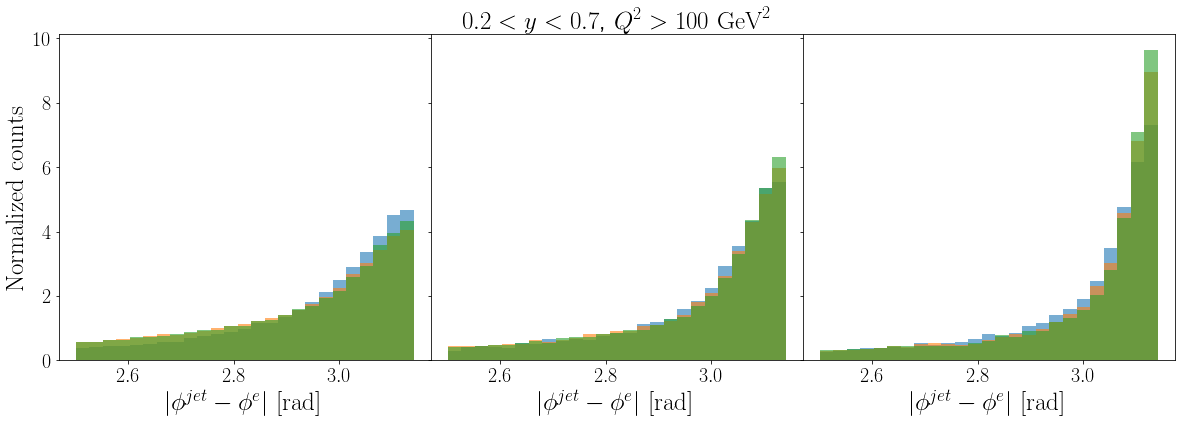

In [23]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    axs[counter].xaxis.set_label_text(r'$|\phi^{jet}-\phi^e|$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    
    #axs[counter].text(0.07,11, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetAzimuthal.pdf', bbox_inches='tight')

(array([0.4432766 , 0.07900653, 0.07480649, 0.08059575, 0.0727632 ,
        0.06617932, 0.06266035, 0.05846029, 0.05437375, 0.06617932,
        0.0704929 , 0.07117399, 0.08070926, 0.08445526, 0.10556918,
        0.10988255, 0.13065604, 0.14983984, 0.17912705, 0.22373812,
        0.30058836, 0.43396795, 0.68154551, 1.26569255, 3.01201343]),
 array([1.4601274e-06, 1.2566510e-01, 2.5132874e-01, 3.7699234e-01,
        5.0265598e-01, 6.2831962e-01, 7.5398326e-01, 8.7964690e-01,
        1.0053105e+00, 1.1309742e+00, 1.2566378e+00, 1.3823014e+00,
        1.5079651e+00, 1.6336287e+00, 1.7592924e+00, 1.8849559e+00,
        2.0106196e+00, 2.1362832e+00, 2.2619469e+00, 2.3876104e+00,
        2.5132742e+00, 2.6389377e+00, 2.7646015e+00, 2.8902650e+00,
        3.0159287e+00, 3.1415923e+00], dtype=float32),
 <a list of 25 Patch objects>)

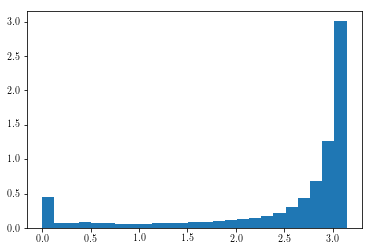

In [24]:
plt.hist(df_jet['jet_dphi'],bins=25,normed=True)

## Markdown

17.087395  mean lepton pt
0.37535104  mean inelasticity
20.970337  mean jet p
14.366471  mean jet pT
count    14667.000000
mean        14.366471
std          6.276723
min          5.000930
25%          9.397035
50%         14.350382
75%         18.092111
max         49.977924
Name: jet_pt, dtype: float64
0.013602744  mean x
499.1152  mean Q2
count    14667.000000
mean       499.115204
std        162.414154
min        281.507263
25%        381.751740
50%        460.730591
75%        568.805481
max       1315.174316
Name: Q2, dtype: float64
###########
8987.0
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370
25

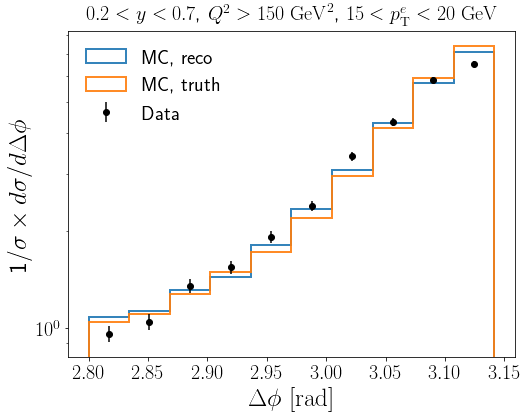

In [25]:
rc('text', usetex=True)
fig = plt.figure(figsize=(8,6))
df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

mindphi = 2.8
nbins = 10
y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
integral = np.sum(y)
print 1.0*integral 
y = y/width
erry = erry/width
y = np.true_divide(y,integral)
erry= np.true_divide(erry,integral)

plt.errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')




    
    #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
printSummary(df_cut)
    
        #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
axs[counter].hist(df_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
printSummary(df_cut)
    

        #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
printSummary(df_cut)
    





plt.xlabel(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/d\Delta\phi}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
 #                   r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.yscale('log')
plt.title('$0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$, $15<p_{\mathrm{T}}^{e}<20$ $\mathrm{GeV}$',fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_deltaphi.png', bbox_inches='tight')
plt.savefig('H1_deltaphi.pdf', bbox_inches='tight')

(array([1.01587618, 0.66030268, 0.5400947 , 0.56450649, 0.79970382,
        1.66035348, 1.36235858, 0.06347118]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 ],
       dtype=float32),
 <a list of 8 Patch objects>)

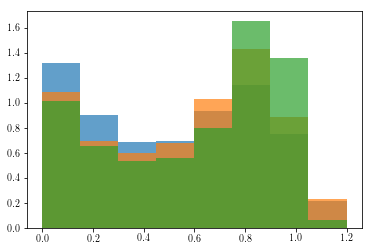

In [26]:
df_cut = df_jet.query('Q2>500')
plt.hist(df_cut['jet_z'],bins=8,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['jet_z'],bins=8,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['genjet_z'],bins=8,range = (0,1.2),alpha=0.7, normed=True)

(array([1.55721877, 2.5198062 , 2.16615663, 1.6734628 , 1.23799524,
        0.96392864, 0.72920612, 0.64962352, 0.56199337, 0.51013107,
        0.52846181, 0.56109946, 0.546346  , 0.50431888, 0.45111503,
        0.38583971, 0.33084749, 0.29820954, 0.24008822, 0.25081792]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 ],
       dtype=float32),
 <a list of 20 Patch objects>)

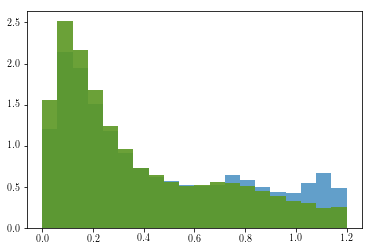

In [27]:
df_cut = df_jet.query('Q2>500')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('Q2>500')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

###########
10643.0
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370
25%        390.239647
50%        465.341583
75%        568.719543
max       1287.933350
Name: Q2, dtype: float64
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370

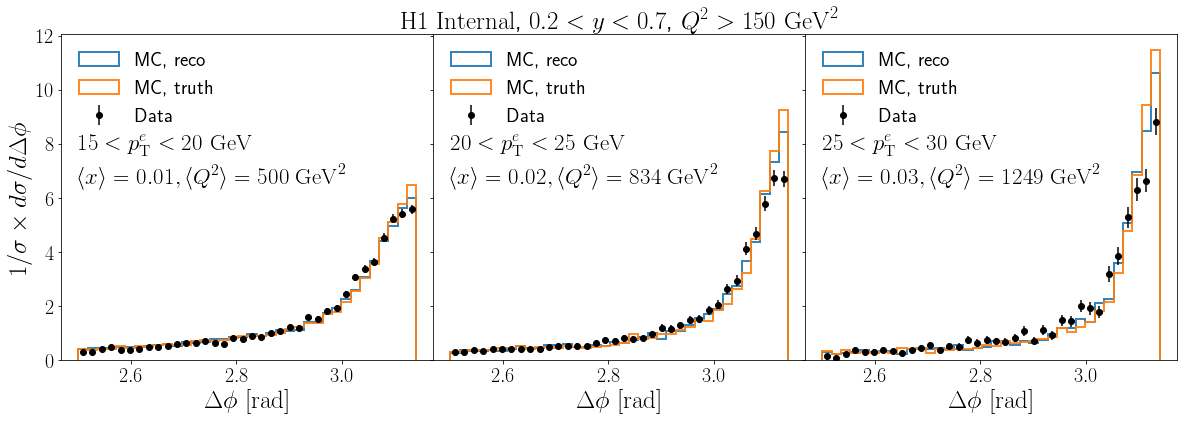

In [28]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

nbins = 36
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(2.5,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=nbins,range=(2.5,np.pi),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
    printSummary(df_cut)
    
        #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=nbins,range=(2.5,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
    printSummary(df_cut)
    
    
    
    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(2.5,6.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetAzimuthal.pdf', bbox_inches='tight')

###########
9407.0
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370
25%        390.239647
50%        465.341583
75%        568.719543
max       1287.933350
Name: Q2, dtype: float64
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370


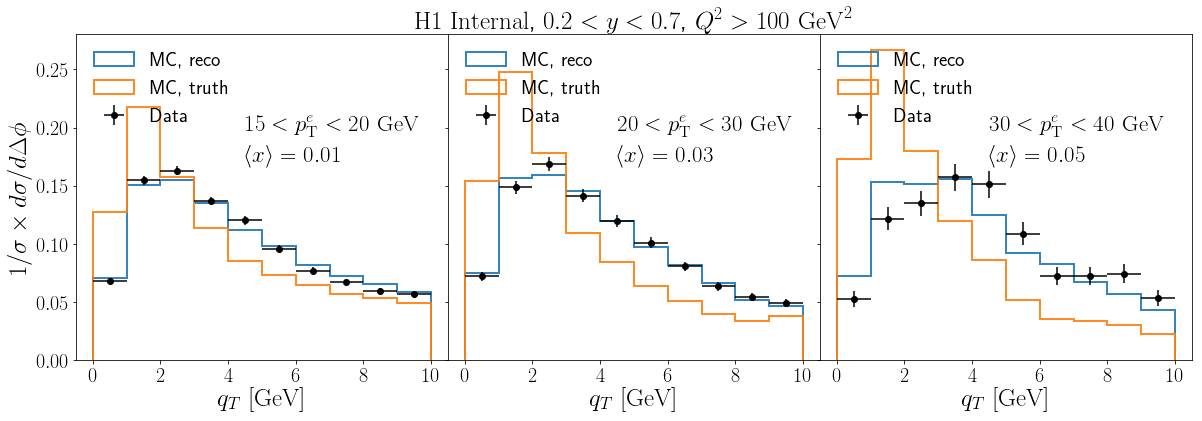

In [29]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,30),(30,40)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    #y = y/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
    printSummary(df_cut)
    
    #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
    printSummary(df_cut)
    
    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{T}$ $\mathrm{[GeV]}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')

    axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqt.png', bbox_inches='tight')
plt.savefig('H1_Leptonqt.pdf', bbox_inches='tight')

###########
11930.0
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370
25%        390.239647
50%        465.341583
75%        568.719543
max       1287.933350
Name: Q2, dtype: float64
17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370

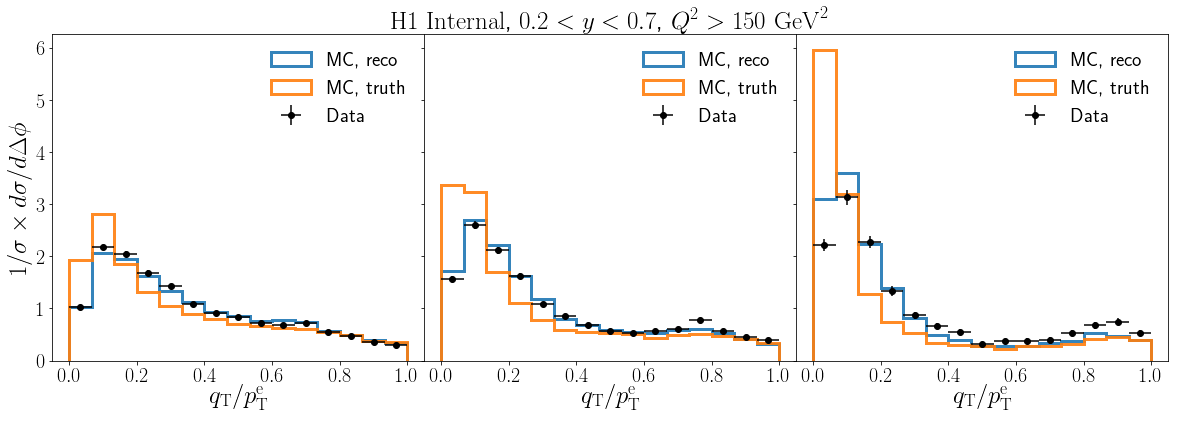

In [30]:


from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

maxrange = 1.0
nbins = 15
for counter,edges in enumerate([(15,20), (20,30),(30,50)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=3)
    printSummary(df_cut)
    
    #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=3)
    printSummary(df_cut)
    
    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='best')

    #axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
     #                 r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqtnormed_ept.png', bbox_inches='tight')
plt.savefig('H1_Leptonqtnormed_ept.pdf', bbox_inches='tight')

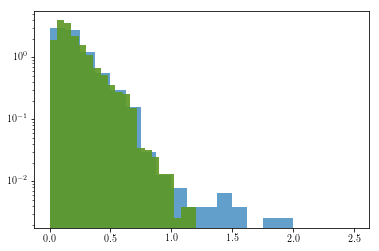

In [31]:
df_cut = df_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,2.5),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)
plt.yscale('log')

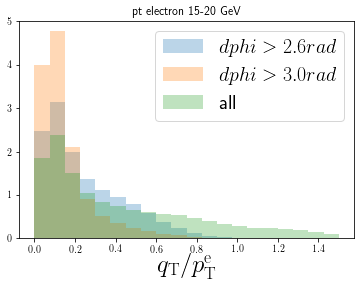

In [32]:
df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>2.6')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='$dphi>2.6 rad$')

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='$dphi>3.0 rad$')

df_cut = mc_jet.query('e_pt>15 and e_pt<20')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='all')
plt.title('pt electron 15-20 GeV')
plt.legend(loc='best',fontsize=20)
plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)

#plt.yscale('log')

# Unfolding studies

In [33]:
coarsebins = 10
finebins = 10
#minval = 2.5
#maxval = np.pi
#variable    = 'jet_dphi' 
#genvariable = 'genjet_dphi'

minval = 0.0
maxval = 10
variable = 'jet_qt'
genvariable = 'genjet_qt'

#minval = 0.0 
#maxval = 1.0
#variable = 'jet_qtnormept'
#genvariable = 'genjet_qtnormept'

#minval = 0.0
#maxval = 1.0
#variable = 'jet_qtnormjetpt'
#genvariable = 'genjet_qtnormjetpt'



M = ROOT.TH2D("M", "M", coarsebins,minval,maxval, finebins,minval,maxval)
M1 = M.Clone("M1")
M2 = M.Clone("M2")
M1.SetTitle("+1#sigma")
M2.SetTitle("-1#sigma")

scaleup = 1.001
scaledn = 0.999



## split the MC to have some "test" data

In [34]:
data_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
print len(mc_cut)
msk = np.random.rand(len(mc_cut)) < 0.5
mctest_cut = mc_cut[msk]
mc_cut   = mc_cut[~msk]
print len(mctest_cut)
print len(mc_cut)

29316
14668
14648


## Fill response matrix

In [35]:
Npe = len(mc_cut[variable])

for i in np.arange(len(mc_cut[variable])):
    x = mc_cut.iloc[i][genvariable]
    y = mc_cut.iloc[i][variable]
    yu = y*scaleup
    yd = y*scaledn
    M.Fill(x, y, 1./Npe)
    M1.Fill(x, yu, 1./Npe)
    M2.Fill(x, yd, 1./Npe)
#
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)


## Draw response matrices

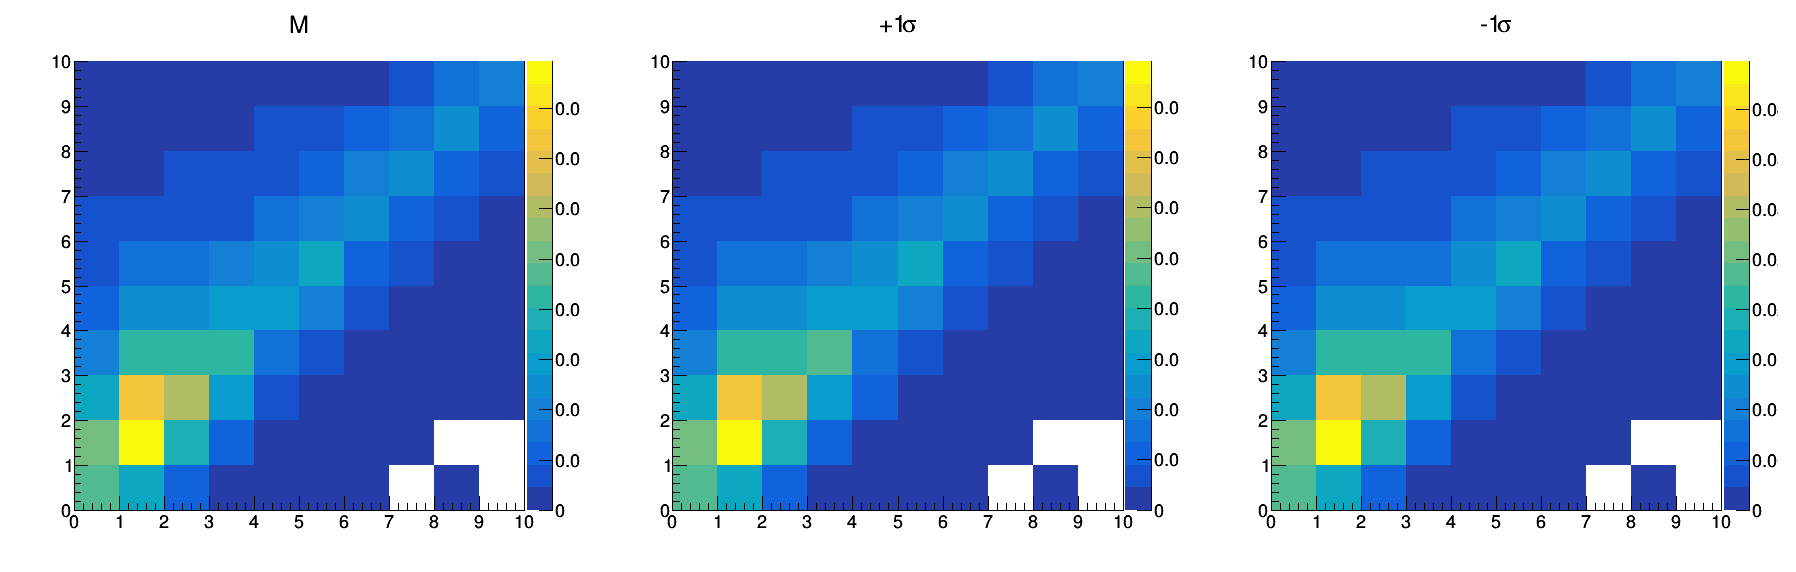

In [36]:
ROOT.gStyle.SetOptStat("")
c0 = ROOT.TCanvas("c0", "c0", 1800, 600)
c0.Divide(3,1)
c0.cd(1)
M.Draw("colz")
c0.cd(2)
M1.Draw("colz")
c0.cd(3)
M2.Draw("colz")
c0.Draw()

## fill mc histograms

In [37]:
h = ROOT.TH1D("h", "h", finebins, minval, maxval)
htrue = ROOT.TH1D("htrue", "htrue", finebins, minval, maxval)

hup = ROOT.TH1D("hup", "hup", finebins, minval, maxval)
hdn = ROOT.TH1D("hdn", "hdn", finebins, minval, maxval)
hup.SetLineStyle(2)
hdn.SetLineStyle(3)

    
for i in np.arange(len(mc_cut[variable])):
    htrue.Fill(mc_cut.iloc[i][genvariable])
    h.Fill(mc_cut.iloc[i][variable])
    hup.Fill(mc_cut.iloc[i][variable]*scaleup)
    hdn.Fill(mc_cut.iloc[i][variable]*scaledn)

## fill data (or pseudodata)

In [38]:
hdata = ROOT.TH1D("hdata", "hdata", finebins, minval, maxval)
hdataup = ROOT.TH1D("hdataup", "hdataup", finebins, minval, maxval)
hdatadn = ROOT.TH1D("hdatadn", "hdatadn", finebins, minval, maxval)
hdataup.SetLineStyle(2)
hdatadn.SetLineStyle(3)

    
    
for i in np.arange(len(mctest_cut[variable])):
    hdata.Fill(mctest_cut.iloc[i][variable])
    hdataup.Fill(mctest_cut.iloc[i][variable]*scaleup)
    hdatadn.Fill(mctest_cut.iloc[i][variable]*scaledn)

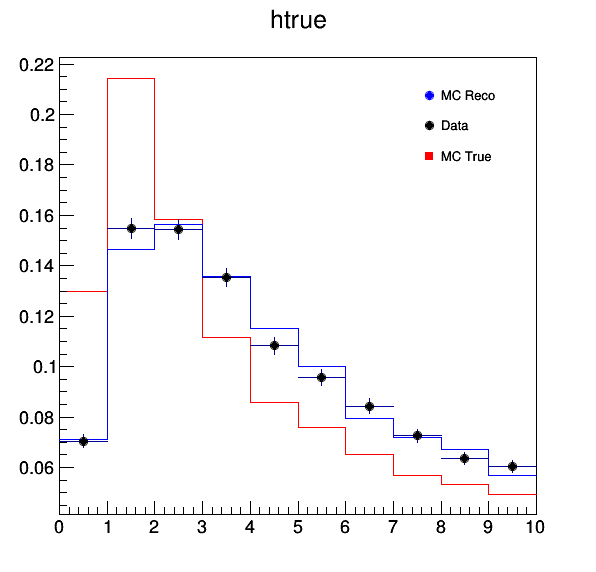

In [39]:
h.SetMarkerStyle(20)
hdata.SetMarkerStyle(20)
htrue.SetMarkerStyle(21)
h.SetMarkerColor(ROOT.kBlue)
htrue.SetMarkerColor(ROOT.kRed)
h.SetLineColor(ROOT.kBlue)
htrue.SetLineColor(ROOT.kRed)

creco = ROOT.TCanvas("creco", "creco", 600, 600)
htrue.DrawNormalized()
h.DrawNormalized('same')
#hup.DrawNormalized("hist same")
#hdn.DrawNormalized("hist same")
htrue.SetLineColor(2)
#htrue.Draw("e same")
hdata.SetMarkerColor(ROOT.kBlack)
hdata.DrawNormalized("e same")

creco.Draw()

ROOT.gStyle.SetOptStat("")


leg1 = ROOT.TLegend(0.7,0.7,0.86, 0.86)
leg1.SetBorderSize(0)
leg1.SetFillColor(0)
leg1.AddEntry( h, 'MC Reco', 'p')
#leg1.AddEntry( hup, '+1#sigma', 'l')
#leg1.AddEntry( hdn, '-1#sigma', 'l')
leg1.AddEntry(hdata, 'Data','p')
leg1.AddEntry( htrue, 'MC True', 'p')
leg1.Draw()

## Setting up unfolding with TUnfold

In [ ]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature#Derivative#Curvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"

u = ROOT.MyTUnfoldDensity(M,orientation,regMode,con)
u.SetInput( hdata )
u.AddSysError(M1, "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.AddSysError(M2, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
#ROOT.TUnfoldDensity.kSysErrModeRelative)# ROOT.TUnfoldDensity.kSysErrModeShift)

In [ ]:
# Regularize
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)

In [ ]:
print (lCurve)
if lCurve:
    cl = ROOT.TCanvas("cl", "cl", 500, 500)
    lCurve.Draw("alp")
    cl.Draw()

In [ ]:
# Get output... DOES NOT CONTAIN SYSTEMATICS. 
o = u.GetOutput("o")

# Get systematic shifts of output
o_up = u.GetDeltaSysSource("Up", "o_upshift", "+1#sigma")
o_dn = u.GetDeltaSysSource("Dn", "o_dnshift", "-1#sigma")
o_up.SetLineStyle(2)
o_dn.SetLineStyle(2)

In [ ]:
ROOT.gStyle.SetOptStat("")

# Get various covariances
cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")

# Now prepare various distributions. 
o_unfunc = o.Clone("o_unc")        # Unfolding and stat unc
o_sys = o.Clone("o_sys")        # Syst uncertainty
o_unctot = o.Clone("o_unctot")  # Total uncertainty
o_sys.SetLineStyle(2)

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output
for i in range( 0, o.GetNbinsX() + 1):
    unc_tot = ROOT.TMath.Sqrt( cov.GetBinContent(i,i) )
    o_unctot.SetBinContent(i, unc_tot )    
    o.SetBinError(i, unc_tot )
    
    yup = abs( o_up.GetBinContent(i))
    ydn = abs( o_dn.GetBinContent(i))
    dy = ROOT.TMath.Sqrt( (yup**2 + ydn**2) )
    o_sys.SetBinContent(i, dy )


htrue2 = htrue.Clone("h2")
hdata2 = hdata.Clone("hdata2")

hdata2.Rebin(finebins//coarsebins)

htrue2.Rebin(finebins//coarsebins)
o.SetMarkerStyle(20)
o.SetMarkerColor(1)
o_unfunc.SetMarkerStyle(0)
o_unfunc.SetLineColor(2)
htrue2.SetMarkerStyle(21)
htrue2.SetMarkerColor(4)
htrue2.SetMarkerStyle(4)
htrue2.SetLineColor(4)

c = ROOT.TCanvas("c","c")
#o.SetMinimum(0.0)
#o.SetMaximum(0.40)

o.DrawNormalized()
#o_unfunc.DrawNormalized("e same")
htrue2.DrawNormalized("e same")
hdata2.SetMarkerColor(2)
hdata2.SetLineColor(2)

hdata2.DrawNormalized("e same")
leg2 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry( o, "Unfolded, total unc",'p')
leg2.AddEntry(hdata, "Reco", 'p')
#leg2.AddEntry( o_unfunc, "stat+unfolding unc",'l')
leg2.AddEntry( htrue2, "True",'p')
#o.SetMinimum(1)
#c.SetLogy()
#gStyle.SetOptStat("")
c.Draw()

In [ ]:
ROOT.gStyle.SetOptStat("")

c2 = ROOT.TCanvas("c2", "c2", 500, 500)
closure = htrue2.Clone("closure")
closure2 = htrue2.Clone("closure2")
closure.SetMarkerColor(1)
closure.SetLineColor(1)
closure2.SetMarkerColor(2)
closure2.SetLineColor(2)
closure.SetTitle("true / unfolded")
closure.Divide(o)
closure2.Divide(o_unfunc)
closure.Draw('e1')
closure2.Draw('e1 same')
closure.SetMaximum(1.5)
closure.SetMinimum(0.5)

legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
legclosure.SetBorderSize(0)
legclosure.SetFillColor(0)
legclosure.AddEntry( closure, "True / Unfolded, All Unc.", 'p')
legclosure.AddEntry( closure2, "True / Unfolded, Stat. Unc.", 'p')
legclosure.Draw()
c2.Draw()

In [ ]:

ccov = ROOT.TCanvas("ccov", "Covariance Matrix", 400, 400)
cov.Draw('colz')
ccov.SetLogz()
ccov.Draw()

In [ ]:
ccov_uncorr = ROOT.TCanvas("ccov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties", 400, 400)
cov_uncorr.Draw('colz')
ccov_uncorr.SetLogz()
ccov_uncorr.Draw()

In [ ]:
ccov_uncorr_data = ROOT.TCanvas("ccov_uncorr_data", "Covariance Matrix from Uncorrelated Uncertainties", 400, 400)
cov_uncorr_data.Draw('colz')
ccov_uncorr_data.SetLogz()
ccov_uncorr_data.Draw()

In [ ]:
#
unc_stack = ROOT.THStack("unc_stack", "Uncertainties")
unc_stack.Add( o_unctot, "hist" )
unc_stack.Add( o_sys, "hist" )
#o_up.Divide(o)
#o_dn.Divide(o)



c_sys = ROOT.TCanvas("c_sys", "c_sys", 500, 500)
unc_stack.Draw("nostack")
unc_stack.SetMaximum( 1.0 * unc_stack.GetMaximum() )
#o_unc.SetMinimum(-0.2)
#o_unc.SetMaximum(+0.2)
legsys = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
legsys.SetFillColor(0)
legsys.SetBorderSize(0)
legsys.AddEntry( o_unctot, 'Total', 'l')
legsys.AddEntry( o_sys, 'Syst', 'l')
legsys.Draw()
c_sys.Draw()

In [ ]:
print u.GetChi2()

## unfolding the old-fashioned way

In [40]:
import ROOT
ROOT.gSystem.Load("/mnt/c/Users/marratia/Linux/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, TH2D, cout, THStack
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
from ROOT import RooUnfoldBinByBin
from ROOT import RooUnfoldIds

from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex

/mnt/c/Users/marratia/Linux/buildroot/lib/ROOT.py:579: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


In [41]:
responseMatrix = M

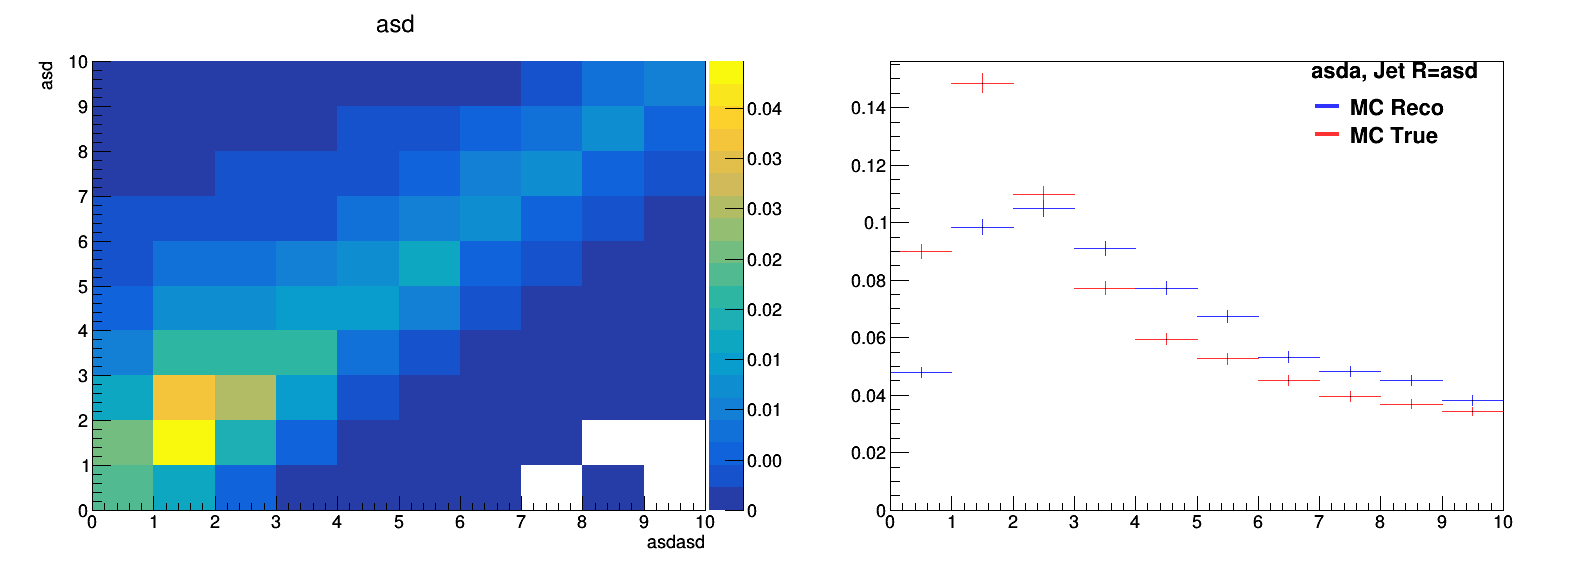

In [42]:
mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
responseMatrix.Draw('colz')
responseMatrix.SetTitle('asd ; asdasd; asd')

#ROOT.gPad.SetLogz()
c.cd(2)


label = Legend("%s, Jet R=%s"%('asda','asd'))
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')

hs_mc = ROOT.THStack()
hs_mc.Add(mc_reco)
hs_mc.Add(mc_truth)
hs_mc.Draw('nostack')
#hs_mc.SetTitle(axestitle[variable])

label.Draw(0.65,.87)
c.Draw()


In [2]:
data                   = hdata.Clone()
c = ROOT.TCanvas('c','c',600,600)

c.Clear()
hs = ROOT.THStack()
hs.Add(data)
#hs.Add(mc_reco)
#hs.Add(mc_truth)
hs.Draw("nostack")
c.Draw()

NameError: name 'hdata' is not defined

In [1]:
data_inputforunfolding = data.Clone()

response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix,"response","response")
response.UseOverflow()

data_unfolded = {}
ErrorMatrices = {}
unfold = {}

nbayes_iter = 4
unfold['Bayes'] =  RooUnfoldBayes(response, data_inputforunfolding, nbayes_iter)
unfold['Bayes'].IncludeSystematics()


data_unfolded['Bayes'] = unfold['Bayes'].Hreco();
ErrorMatrices['Bayes'] = unfold['Bayes'].Ereco();





NameError: name 'data' is not defined

In [56]:
for key in ['Bayes']:
    print '%%%%%%%%%%%%%%%%%%%%%% ', key
    print unfold[key].Chi2(mc_truth,0)
    print 'Option 1: use errors propagated through the unfolding'
    print unfold[key].Chi2(mc_truth,1)
    print 'Option 2: use covariance matrix returned from unfolding'
    print unfold[key].Chi2(mc_truth,2)
    print 'Option 3: use covariance matrix from the variation of the results in toy MC tests'
    print unfold[key].Chi2(mc_truth,3)

%%%%%%%%%%%%%%%%%%%%%%  Bayes
9686.22815057
Option 1: use errors propagated through the unfolding
nan
Option 2: use covariance matrix returned from unfolding
-1.0
Option 3: use covariance matrix from the variation of the results in toy MC tests
-1.0
covariance matrix condition=-1, determinant=0, tolerance=2.22045e-16
Add truth bin for -0.0233418 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 121748
Iteration : 1
Chi^2 of change 67.3189
Iteration : 2
Chi^2 of change 24.5157
Add truth bin for -0.0233418 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 120249
Iteration : 1
Chi^2 of change 72.1191
Iteration : 2
Chi^2 of change 27.2607
Add truth bin for -0.0233418 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 120155
Iteration : 1
Chi^2 of change 74.1661
Iteration : 2
Chi^2 of change 25.1925
Add truth bin for -0.0233418 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 122711
Iteration : 1
Chi^2 of change 77.9906
Iteration : 2
Chi^2 of change 30.6286
Add truth bin for -0.

Error in <TDecompSVD::Diagonalize>: no convergence after 101 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 102 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 103 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 104 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 105 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 106 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 107 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 108 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 109 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 101 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 102 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 103 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 104 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 105 steps
Error in <TDecompSVD::Diagonalize>: no convergence after 106 s

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


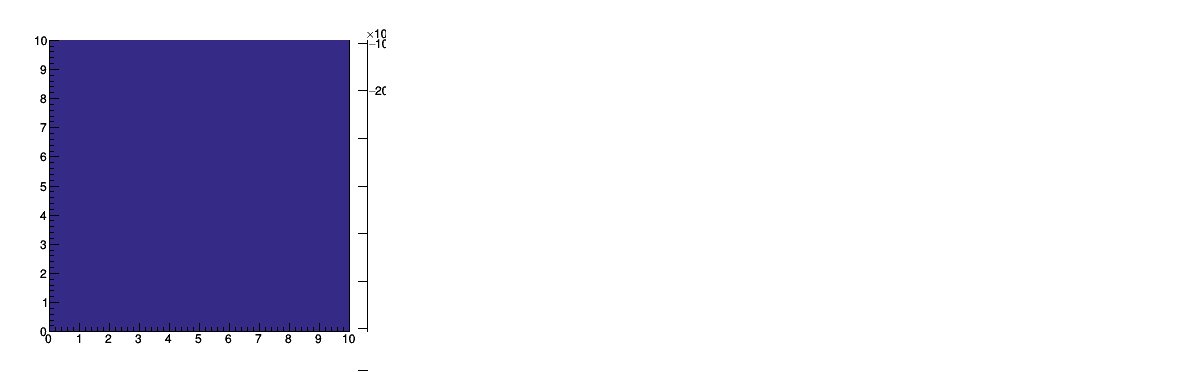

In [57]:
c = ROOT.TCanvas('c','c',1200,400)

c.Divide(3)
c.cd(1)
#print ErrorMatrices.GetMaximum()
ErrorMatrices['Bayes'].Draw("colz")
#ErrorMatrices['Bayes'].GetXaxis().SetTitle('; bin reco bin truth')
#c.cd(2)
#ErrorMatrices['SVD'].Draw("colz")
#c.cd(3)
#ErrorMatrices['IDS'].Draw("colz")

c.Draw()

In [ ]:

def GetCorrelationMatrix ( cov, name):

    nrows= cov.GetNrows()
    ncolumns = cov.GetNcols()
    
    h= ROOT.TH2D (name, "", nrows, 0, nrows, ncolumns, 0, ncolumns);
    h.SetAxisRange (-1.0, 1.0, "Z")
    for i in range(nrows) :
        for j in range(ncolumns) :
            Viijj= cov(i,i)*cov(j,j)
            if Viijj>0.0: h.SetBinContent (i+1, j+1, cov(i,j)/ROOT.TMath.Sqrt(Viijj))
            
    return h

In [ ]:

c = ROOT.TCanvas('c','c',900,600)
correlation = {}

correlation['Bayes'] = GetCorrelationMatrix(ErrorMatrices['Bayes'], 'Bayes')
correlation['Bayes'].Draw('colz')
correlation['Bayes'].GetXaxis().SetRangeUser(1,7)
correlation['Bayes'].GetYaxis().SetRangeUser(1,7)
correlation['Bayes'].GetXaxis().SetTitle('Bin number')
correlation['Bayes'].GetYaxis().SetTitle('Bin number')
correlation['Bayes'].SetTitle('Bin number')

#label = Legend("%s, Pearson Coefficients, Jet R=%s"%(datatitle,jet_R))
#label.Draw(0.32,.97)


c.Draw()

In [ ]:
c = ROOT.TCanvas('c','c',900,600)

label = Legend("%s, Jet R=%s"%('asd','asd'))
alpha = 0.7
hstack = ROOT.THStack()
data.SetLineWidth(2)
data.SetLineColorAlpha(1,alpha)

mc_truth.SetLineColor(1)
mc_truth.SetMarkerColor(1)
#label.Add(data,'MC truth','hist')

data.SetMarkerStyle(20)

color = {}
color['Bayes'] = 2

for key in ['Bayes']:
    data_unfolded[key].SetMarkerStyle(20)
    data_unfolded[key].SetLineWidth(2)
    data_unfolded[key].SetLineColorAlpha(color[key],alpha)
    data_unfolded[key].SetMarkerColor(color[key])
    for i in range(3,data_unfolded[key].GetNbinsX()+1):
        print key, ' ' , i , ' ', data_unfolded[key].GetBinCenter(i), ' %2.3f'%data_unfolded[key].GetBinContent(i), ' %2.3f'%data_unfolded[key].GetBinError(i)

#hstack.Add(data)
#hstack.Add(mc_truth)
hstack.Add(data_unfolded['Bayes'])
label.Add(data_unfolded['Bayes'],'Bayes (%i iter)'%nbayes_iter,'L')      


hstack.SetTitle('; variable; normalized entries')
hstack.Draw('nostack')
hstack.GetYaxis().SetNdivisions(6)
#label.Draw(.69,.89)

c.Draw()
#c.SaveAs('Unfoldedresult%s.pdf'%(datatype))